In [1]:
#library
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns 

plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [2]:
pd.plotting.register_matplotlib_converters()

**Proses membaca data**

In [3]:
#membaca data
covid_df = pd.read_csv('datacovid.csv', index_col='date', parse_dates=True)

In [4]:
#menampilka data
covid_df.head()

,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
date,,,,,,,,,,
2020-07-01,1.590000e+12,1,58,789,1385,538,57770,25595,2934,29241
2020-07-02,1.590000e+12,1,53,1072,1624,499,59394,26667,2987,29740
2020-07-03,1.590000e+12,1,49,901,1301,351,60695,27568,3036,30091
2020-07-04,1.590000e+12,1,53,651,1447,743,62142,28219,3089,30834
2020-07-05,1.590000e+12,1,82,886,1607,639,63749,29105,3171,31473


In [5]:
#deskripsi data
covid_df.describe()

,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
count,1.840000e+02,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,1.601848e+12,1.005435,104.684783,3186.364130,3732.679348,441.630435,318688.875000,249743.663043,11039.717391,57905.494565
std,5.807353e+09,0.073721,40.495950,1456.708631,1725.031398,861.210880,197410.956819,172715.239474,5387.443014,20733.130015
min,1.590000e+12,1.000000,42.000000,651.000000,1209.000000,-1762.000000,57770.000000,25595.000000,2934.000000,29241.000000
25%,1.600000e+12,1.000000,77.500000,1911.250000,2096.000000,-13.000000,139028.750000,92657.500000,6130.250000,39065.750000
50%,1.600000e+12,1.000000,97.500000,3483.500000,3734.500000,409.500000,289095.000000,216717.000000,10798.000000,56894.000000
75%,1.610000e+12,1.000000,124.000000,4089.500000,4507.250000,898.000000,467996.750000,392854.000000,15232.250000,63971.250000
max,1.610000e+12,2.000000,258.000000,7356.000000,8369.000000,4540.000000,743198.000000,611097.000000,22138.000000,109963.000000


**Visualisasi data**

In [6]:
#visualisasi data
df = covid_df.groupby(["date"])[['jumlah_positif', 'jumlah_meninggal', 'jumlah_sembuh']].sum().reset_index()
sorted_By_Confirmed=df.sort_values('jumlah_positif',ascending=False)
sorted_By_Confirmed=sorted_By_Confirmed.drop_duplicates('date')

indonesia_Confirmed_Total=sorted_By_Confirmed['jumlah_positif'].sum()
indonesia_Deaths_Total=sorted_By_Confirmed['jumlah_meninggal'].sum()
indonesia_Recovered_Total=sorted_By_Confirmed['jumlah_sembuh'].sum()


Active=indonesia_Confirmed_Total-indonesia_Deaths_Total-indonesia_Recovered_Total

indonesia_Deaths_rate=(indonesia_Deaths_Total*100)/indonesia_Confirmed_Total
indonesia_Recovered_rate=(indonesia_Recovered_Total*100)/indonesia_Confirmed_Total


veri={'Total Confirmed cases  in the Indonesia':indonesia_Confirmed_Total,'Total Deaths cases in the Indonesia':indonesia_Deaths_Total,'Total Recovered cases in the Indonesia':indonesia_Recovered_Total,'Total Active Cases':Active,'Rate of Recovered Cases %':indonesia_Recovered_rate,'Rate of Deaths Cases %':indonesia_Deaths_rate}
veri=pd.DataFrame.from_dict(veri, orient='index' ,columns=['Total'])
print("12/31/2020") 
veri.style.background_gradient(cmap='Greens')

12/31/2020


,Total
Total Confirmed cases in the Indonesia,686813.000000
Total Deaths cases in the Indonesia,19262.000000
Total Recovered cases in the Indonesia,586291.000000
Total Active Cases,81260.000000
Rate of Recovered Cases %,85.363993
Rate of Deaths Cases %,2.804548


In [7]:
#visualisasi data
Recovered_rate=(sorted_By_Confirmed['jumlah_sembuh']*100)/sorted_By_Confirmed['jumlah_positif']
Deaths_rate=(sorted_By_Confirmed['jumlah_meninggal']*100)/sorted_By_Confirmed['jumlah_positif']
cases_rate=(sorted_By_Confirmed.jumlah_positif*100)/indonesia_Confirmed_Total

sorted_By_Confirmed['Active']=sorted_By_Confirmed['jumlah_positif']-sorted_By_Confirmed['jumlah_meninggal']-sorted_By_Confirmed['jumlah_sembuh']
sorted_By_Confirmed['Recovered Cases Rate %']=pd.DataFrame(Recovered_rate)
sorted_By_Confirmed['Deaths Cases Rate %']=pd.DataFrame(Deaths_rate)
sorted_By_Confirmed['Total Cases Rate %']=pd.DataFrame(cases_rate)

print("Sorted By Confirmed Cases")
sorted_By_Confirmed.style.background_gradient(cmap='Reds')

Sorted By Confirmed Cases


,date,jumlah_positif,jumlah_meninggal,jumlah_sembuh,Active,Recovered Cases Rate %,Deaths Cases Rate %,Total Cases Rate %
155,2020-12-03 00:00:00,8369,156,3673,4540,43.888159,1.864022,1.218527
183,2020-12-31 00:00:00,8074,194,7356,524,91.107258,2.402774,1.175575
182,2020-12-30 00:00:00,8002,241,6958,803,86.953262,3.011747,1.165092
181,2020-12-29 00:00:00,7903,251,6805,847,86.106542,3.176009,1.150677
171,2020-12-19 00:00:00,7751,145,4265,3341,55.025158,1.870726,1.128546
175,2020-12-23 00:00:00,7514,151,5981,1382,79.598084,2.009582,1.094039
169,2020-12-17 00:00:00,7354,142,4995,2217,67.922219,1.930922,1.070743
177,2020-12-25 00:00:00,7259,258,6324,677,87.119438,3.554209,1.056911
176,2020-12-24 00:00:00,7199,181,5277,1741,73.301847,2.514238,1.048175
172,2020-12-20 00:00:00,6982,221,5551,1210,79.504440,3.165282,1.016579


Text(0.5, 1.0, 'Total Cases')

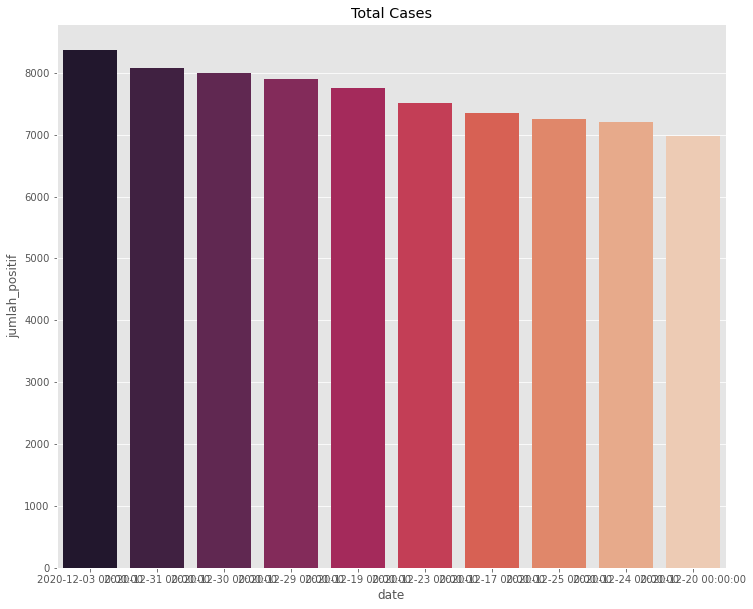

In [8]:
#visualisasi data
sorted_By_Confirmed1=sorted_By_Confirmed.head(10)
x=sorted_By_Confirmed1.date
y=sorted_By_Confirmed1.jumlah_positif
plt.rcParams['figure.figsize'] = (12, 10)
sns.barplot(x,y,order=x ,palette="rocket").set_title('Total Cases')  #graf çizdir (Most popular)

Text(0.5, 1.0, 'Total Deaths')

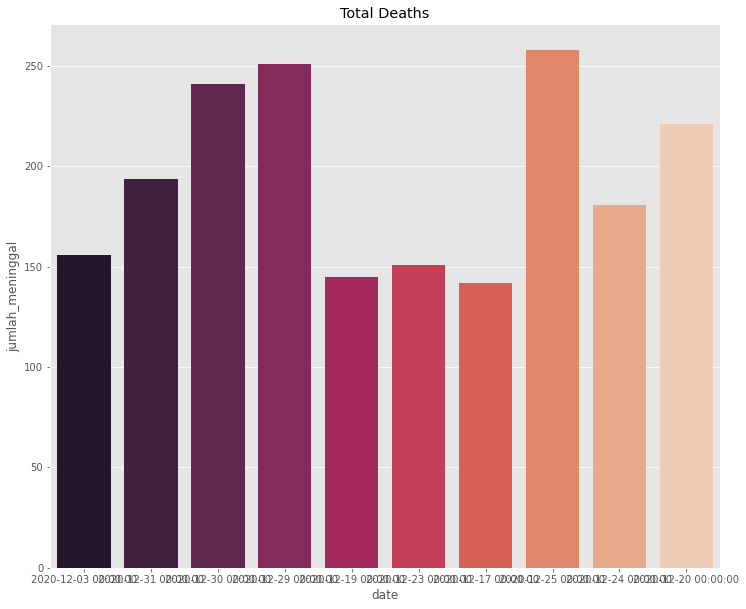

In [9]:
#visualisasi data
sorted_By_Confirmed1=sorted_By_Confirmed.head(10)
x=sorted_By_Confirmed1.date
y=sorted_By_Confirmed1.jumlah_meninggal
plt.rcParams['figure.figsize'] = (12, 10)
sns.barplot(x,y,order=x ,palette="rocket").set_title('Total Deaths')  #graf çizdir (Most popular)

Text(0.5, 1.0, 'Total Cases Recovered')

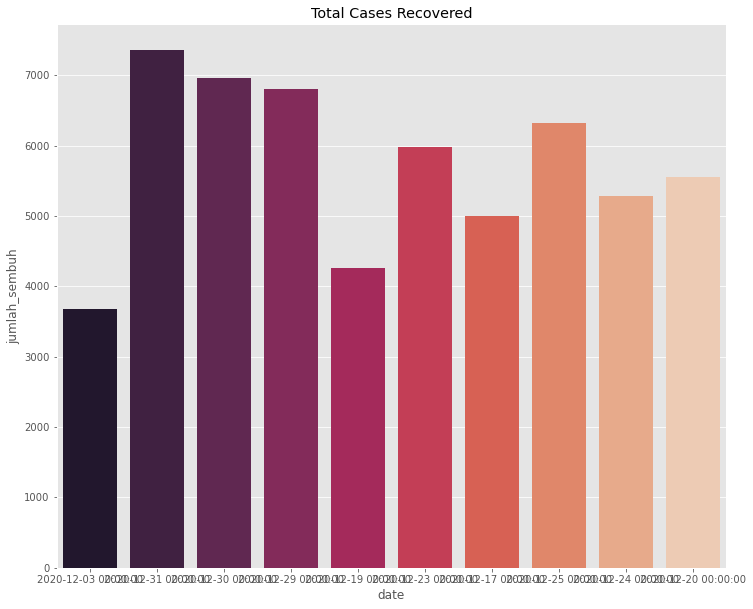

In [10]:
#visualisasi data
sorted_By_Confirmed1=sorted_By_Confirmed.head(10)
x=sorted_By_Confirmed1.date
y=sorted_By_Confirmed1.jumlah_sembuh
plt.rcParams['figure.figsize'] = (12, 10)
sns.barplot(x,y,order=x ,palette="rocket").set_title('Total Cases Recovered')  #graf çizdir (Most popular)

**Data untuk modeling**

In [11]:
#reset data untuk proses pemodelan
df = covid_df.reset_index()

In [12]:
#menampilkan data
df.head()

,date,key,doc_count,jumlah_meninggal,jumlah_sembuh,jumlah_positif,jumlah_dirawat,jumlah_positif_kum,jumlah_sembuh_kum,jumlah_meninggal_kum,jumlah_dirawat_kum
0,2020-07-01,1.590000e+12,1,58,789,1385,538,57770,25595,2934,29241
1,2020-07-02,1.590000e+12,1,53,1072,1624,499,59394,26667,2987,29740
2,2020-07-03,1.590000e+12,1,49,901,1301,351,60695,27568,3036,30091
3,2020-07-04,1.590000e+12,1,53,651,1447,743,62142,28219,3089,30834
4,2020-07-05,1.590000e+12,1,82,886,1607,639,63749,29105,3171,31473


**Preprocessing**

In [13]:
del df['key']

In [14]:
del df['doc_count']

In [15]:
del df['jumlah_meninggal']

In [16]:
del df['jumlah_sembuh']

In [17]:
del df['jumlah_dirawat']

In [18]:
del df['jumlah_positif_kum']

In [19]:
del df['jumlah_sembuh_kum']

In [20]:
del df['jumlah_meninggal_kum']

In [21]:
del df['jumlah_dirawat_kum']

In [22]:
df.head()

,date,jumlah_positif
0,2020-07-01,1385
1,2020-07-02,1624
2,2020-07-03,1301
3,2020-07-04,1447
4,2020-07-05,1607


In [23]:
#cek nilai null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            184 non-null    datetime64[ns]
 1   jumlah_positif  184 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [24]:
df.dropna

<bound method DataFrame.dropna of           date  jumlah_positif
0   2020-07-01            1385
1   2020-07-02            1624
2   2020-07-03            1301
3   2020-07-04            1447
4   2020-07-05            1607
..         ...             ...
179 2020-12-27            6528
180 2020-12-28            5854
181 2020-12-29            7903
182 2020-12-30            8002
183 2020-12-31            8074

[184 rows x 2 columns]>

In [25]:
df=df.rename(columns={'date':'ds', 'jumlah_positif':'y'})

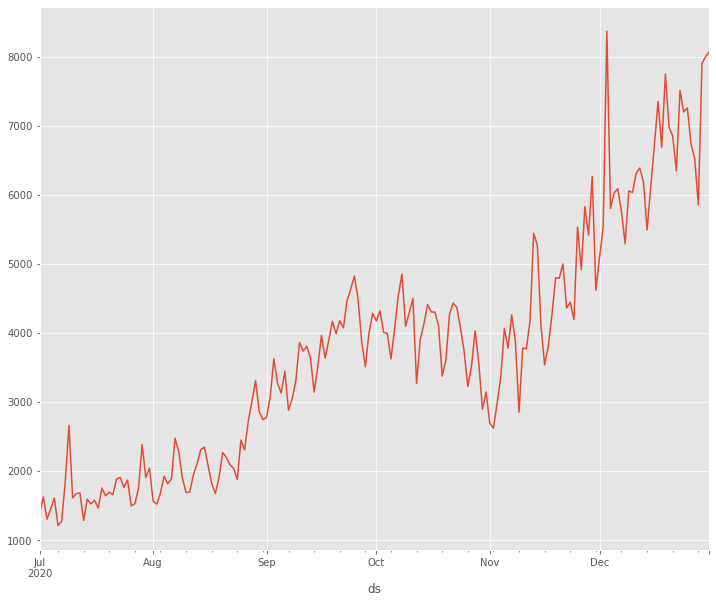

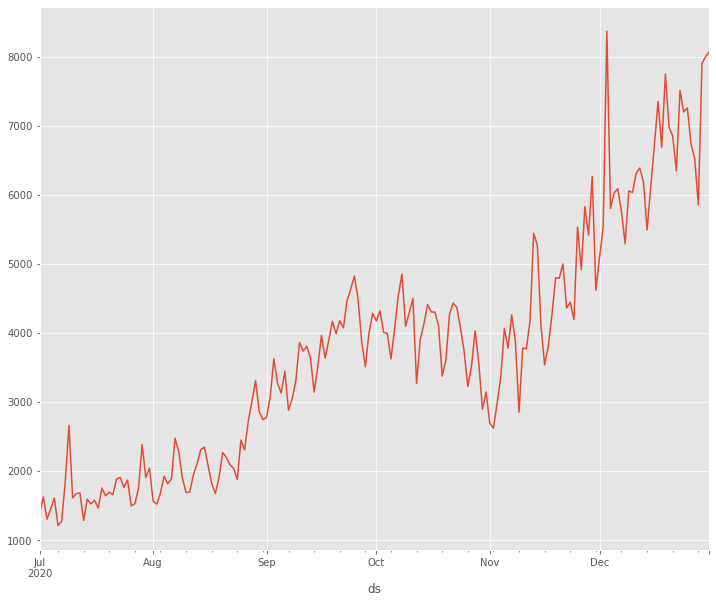

In [26]:
plt.figure()
df.set_index('ds').y.plot().get_figure()

**Modeling**

In [27]:
model = Prophet(weekly_seasonality=True)
model.fit(df);
model.weekly_seasonality

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


True

In [28]:
future = model.make_future_dataframe(periods=181, freq = 'd')
future.tail()

,ds
360,2021-06-26
361,2021-06-27
362,2021-06-28
363,2021-06-29
364,2021-06-30


In [29]:
forecast = model.predict(future)

In [30]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
360,2021-06-26,18672.322676,16050.102005,21429.020974,15798.146065,21283.154631,178.853829,178.853829,178.853829,178.853829,178.853829,178.853829,0.0,0.0,0.0,18851.176505
361,2021-06-27,18735.960439,15820.703325,21327.819468,15851.670127,21370.509064,-64.063031,-64.063031,-64.063031,-64.063031,-64.063031,-64.063031,0.0,0.0,0.0,18671.897407
362,2021-06-28,18799.598201,15391.738861,21051.027485,15889.284674,21460.947315,-501.348789,-501.348789,-501.348789,-501.348789,-501.348789,-501.348789,0.0,0.0,0.0,18298.249412
363,2021-06-29,18863.235964,15710.240707,21235.347763,15925.640352,21556.645634,-255.775342,-255.775342,-255.775342,-255.775342,-255.775342,-255.775342,0.0,0.0,0.0,18607.460621
364,2021-06-30,18926.873726,16016.798270,21825.180670,15954.946618,21653.189601,117.823952,117.823952,117.823952,117.823952,117.823952,117.823952,0.0,0.0,0.0,19044.697678


In [31]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
360,2021-06-26,18851.176505,16050.102005,21429.020974
361,2021-06-27,18671.897407,15820.703325,21327.819468
362,2021-06-28,18298.249412,15391.738861,21051.027485
363,2021-06-29,18607.460621,15710.240707,21235.347763
364,2021-06-30,19044.697678,16016.798270,21825.180670


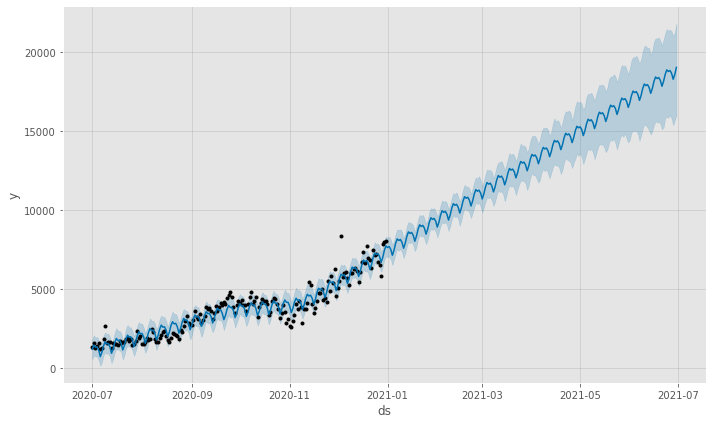

In [32]:
model.plot(forecast);

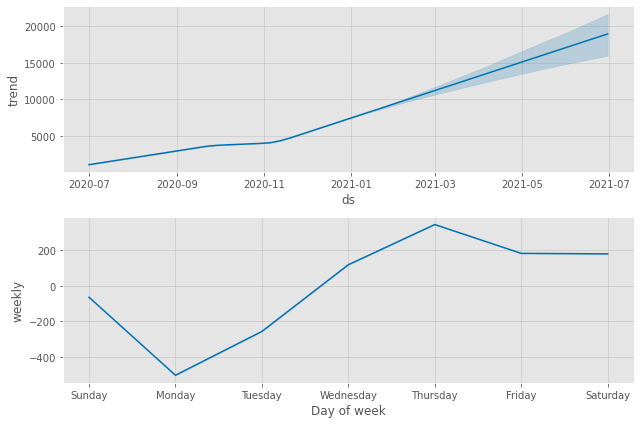

In [33]:
model.plot_components(forecast);

In [34]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [35]:
metric_df.tail()

,ds,yhat,y
360,2021-06-26,18851.176505,NaN
361,2021-06-27,18671.897407,NaN
362,2021-06-28,18298.249412,NaN
363,2021-06-29,18607.460621,NaN
364,2021-06-30,19044.697678,NaN


In [36]:
metric_df.dropna(inplace=True)

In [37]:
metric_df.tail()

,ds,yhat,y
179,2020-12-27,7089.824643,6528.0
180,2020-12-28,6716.176647,5854.0
181,2020-12-29,7025.387857,7903.0
182,2020-12-30,7462.624913,8002.0
183,2020-12-31,7751.434896,8074.0


In [38]:
r2_score(metric_df.y, metric_df.yhat)

0.921653461869777

In [39]:
mean_squared_error(metric_df.y, metric_df.yhat)

231871.347699226

In [40]:
mean_absolute_error(metric_df.y, metric_df.yhat)

367.85581902248754

In [41]:
#metric menggunakan library ML_Metrics
import ml_metrics as metrics
metrics.mae(metric_df.y, metric_df.yhat)

367.85581902248754

In [42]:
metrics.ae(metric_df.y, metric_df.yhat)

array([ 165.35165958,  149.01862185,   42.65923392,   75.83932979,
        448.59537261,  457.72031301,  240.98604835,  422.22593648,
        970.89289817,   56.21504182,   88.71360495,  311.46964718,
        319.594587  ,  352.86032163,  119.89979038,  323.23282881,
        303.9106853 ,   41.4121223 ,   58.34391981,  519.46885937,
        205.73459387,   28.97448173,  202.35855683,  216.03641344,
        136.53785181,  299.78181107,  140.34312726,   87.60886052,
        316.84874715,  415.48429265,  148.21126922,  655.76182632,
        484.0549043 ,   83.0209153 ,   50.23752984,  460.57170226,
        649.08005021,   73.06678379,  150.60996274,  322.02923015,
        121.07959998,  390.98917487,  545.99726698,  645.57828552,
        305.50412211,  295.25353922,  346.74547722,  199.86851763,
        623.93825979,  799.03384859,  690.70236381,  628.71569708,
        763.55261088,  604.13204556,  357.37989603,   63.48695156,
        608.61985373,  451.32568233,   36.37632897,  240.74944

In [43]:
metrics.rmse(metric_df.y, metric_df.yhat)

481.5302147313562